In [2]:
#IMPORTANTO BIBLIOTECAS
import pandas as pd #dataframe (tabulares)
import seaborn as srn #gáficos
import statistics as sts #estatistica

In [3]:
#importando os dados
dataset=pd.read_csv('Churn.csv', sep=";")
dataset.head() #visualizar

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
#tamanho
dataset.shape

(999, 12)

In [5]:
#primeiro problema é dar nome as colunas
dataset.columns=['id','score','estado','genero','idade','patrimônio','saldo','produtos','temcartcredit','ativo','salário','saiu']

In [6]:
dataset.head()

,id,score,estado,genero,idade,patrimônio,saldo,produtos,temcartcredit,ativo,salário,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [7]:
#explorar dados categóricos
#estado
agrupado=dataset.groupby(['estado']).size()
agrupado

estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<AxesSubplot:xlabel='estado'>

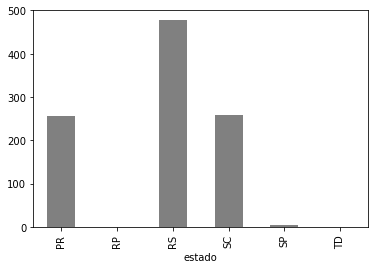

In [8]:
#visualizando por grafico barras
agrupado.plot.bar(color='gray')

In [9]:
#agrupando genero
agrupado=dataset.groupby(['genero']).size()
agrupado

genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<AxesSubplot:xlabel='genero'>

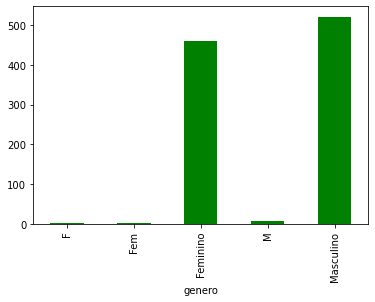

In [10]:
agrupado.plot.bar(color='green')

In [11]:
#explorar colunas numéricas
#score
dataset['score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: score, dtype: float64

<AxesSubplot:xlabel='score'>

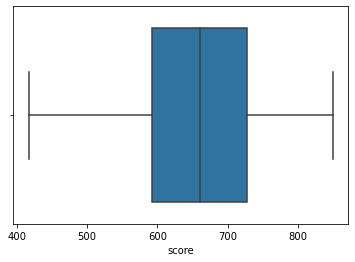

In [12]:
#visualizando por boxplot
srn.boxplot(x=(dataset['score']), data=(dataset['score']))

Text(0.5, 1.0, 'Score')

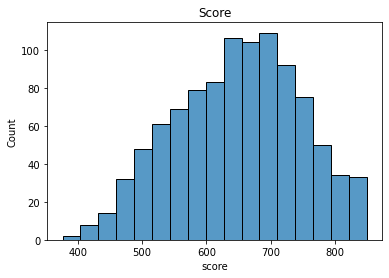

In [13]:
#histograma
srn.histplot(dataset['score']).set_title('Score')

In [14]:
#IDADE
dataset['idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

Text(0.5, 1.0, 'idade')

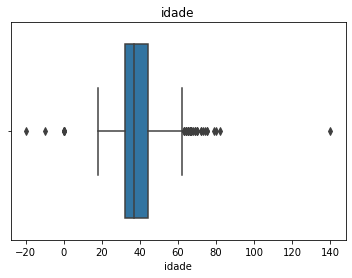

In [15]:
#plotando
srn.boxplot(x=(dataset['idade']),data=dataset['idade']).set_title('idade')

Text(0.5, 1.0, 'idade')

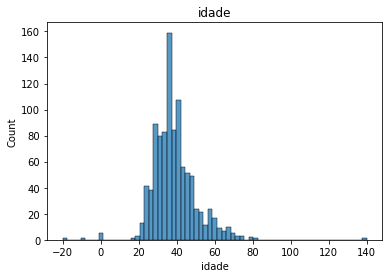

In [16]:
srn.histplot(dataset['idade']).set_title('idade')

In [17]:
#Saldo
dataset['saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: saldo, dtype: float64

Text(0.5, 1.0, 'saldo')

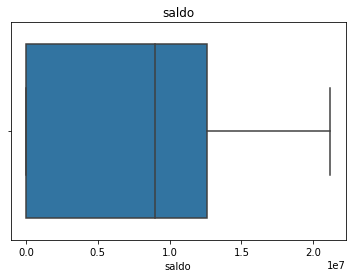

In [18]:
#plot
srn.boxplot(x=(dataset['saldo']),data=dataset['saldo']).set_title('saldo')

Text(0.5, 1.0, 'saldo')

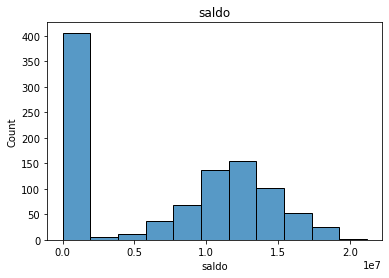

In [19]:
srn.histplot(dataset['saldo']).set_title('saldo')

In [20]:
#salario
dataset['salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salário, dtype: float64

Text(0.5, 1.0, 'salário')

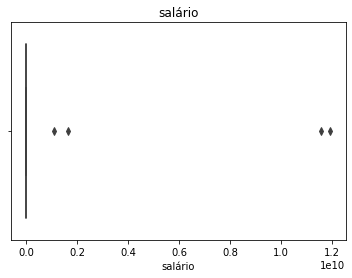

In [21]:
srn.boxplot(x=(dataset['salário']),data=dataset['salário']).set_title('salário')

Text(0.5, 1.0, 'salário')

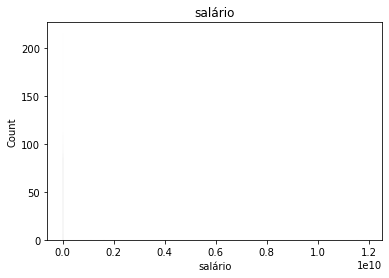

In [22]:
srn.histplot(dataset['salário']).set_title('salário')

In [23]:
#contamos valores NAN
#genero e salario
dataset.isnull().sum()

id               0
score            0
estado           0
genero           8
idade            0
patrimônio       0
saldo            0
produtos         0
temcartcredit    0
ativo            0
salário          7
saiu             0
dtype: int64

In [24]:
#salarios
#remover nas e substituir por mediana
dataset['salário'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: salário, dtype: float64

In [25]:
mediana=sts.median(dataset['salário'])
print(mediana)

70518.0


In [26]:
#substituir NAN por mediana
dataset['salário'].fillna(mediana, inplace=True)

In [27]:
dataset['salário'].isnull().sum()

0

In [28]:
#Agora vamos tratar os generos
#primeiro padronizar
agrupado=dataset.groupby(['genero']).size()
agrupado

genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [29]:
#verificando nas
dataset['genero'].isnull().sum()

8

In [30]:
#preencher NAS com masculino que é a moda
dataset['genero'].fillna('Masculino', inplace=True)

In [31]:
dataset['genero'].isnull().sum()

0

In [32]:
#padroniza de acordo com o domínio
dataset.loc[dataset['genero']== 'M', 'genero']='Masculino'
dataset.loc[dataset['genero'].isin(['Fem','F']), 'genero']='Feminino' #"isin" significa "está em"
#visualizando o resultado
agrupado=dataset.groupby(['genero']).size()
agrupado

genero
Feminino     464
Masculino    535
dtype: int64

In [33]:
#idades fora do dominio
dataset['idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: idade, dtype: float64

In [34]:
#visualizar quantos estão fora do dominio
dataset.loc[((dataset['idade'])<0) | ((dataset['idade']>120))]

,id,score,estado,genero,idade,patrimônio,saldo,produtos,temcartcredit,ativo,salário,saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [35]:
#calcular mediana
medianai= sts.median(dataset['idade'])
medianai

37

In [36]:
#substituir
dataset.loc[((dataset['idade'])<0) | ((dataset['idade']>120))] = 37

In [37]:
#verificar se ainda existem idades fora do domínio
dataset.loc[((dataset['idade'])<0) | ((dataset['idade']>120))]

,id,score,estado,genero,idade,patrimônio,saldo,produtos,temcartcredit,ativo,salário,saiu


In [38]:
#dados duplicados bscamos pelo ID
dataset[dataset.duplicated(['id'],keep=False)]

,id,score,estado,genero,idade,patrimônio,saldo,produtos,temcartcredit,ativo,salário,saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [39]:
#excluimos pelo ID
dataset.drop_duplicates(subset='id',keep='first',inplace=True)
#buscamos duplicados
dataset[dataset.duplicated(['id'],keep=False)]

,id,score,estado,genero,idade,patrimônio,saldo,produtos,temcartcredit,ativo,salário,saiu


In [40]:
#Estados fora do domínio
agrupado=dataset.groupby(['estado']).size()
agrupado

estado
PR    257
RP      1
RS    474
SC    258
SP      4
TD      1
dtype: int64

In [41]:
#atribuir a moda para os errados
dataset.loc[dataset['estado'].isin(['RP','SP','TD']), 'estado']='RS'
agrupado=dataset.groupby(['estado']).size()
agrupado

estado
PR    257
RS    480
SC    258
dtype: int64

In [42]:
#outliers em salários, vamos considerar que os valores maiores que 2 desvios padrão são outliers
desv=sts.stdev(dataset['salário'])
desv

529784177.6096346

In [43]:
#checamos se alguem é 2 vezes maior que os desv
dataset.loc[dataset['salário']>=2*desv]

,id,score,estado,genero,idade,patrimônio,saldo,produtos,temcartcredit,ativo,salário,saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [44]:
#vamos substituir pela mediana
medianas=sts.median(dataset['salário'])
medianas

8641028.0

In [45]:
dataset.loc[dataset['salário']>=2*desv]=medianas

In [46]:
dataset.loc[dataset['salário']>=2*desv]

,id,score,estado,genero,idade,patrimônio,saldo,produtos,temcartcredit,ativo,salário,saiu


In [47]:
dataset.head()

,id,score,estado,genero,idade,patrimônio,saldo,produtos,temcartcredit,ativo,salário,saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
